<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left"><i>Machine learning<i> para la toma de decisiones y la automatización de procesos empresariales</h1>

<h2 align="left"><i>Customer Segmentation and Prediction of Target Marketing</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Aplicaciones de Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>22/02/2023</i>
  <br><br>
  <!-- <a href="#tabla-de-contenido">Tabla de contenido</a> • -->
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <!-- <a href="#agradecimientos">Agradecimientos</a> -->
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-applications-course/blob/main/1-customer-segmentation-target marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-python-applications-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-ml-course?style=social" alt="Fork"/>
      </a>
  </td>
</table>
<br>
<br>

---

Ofrecer un servicio o producto a los clientes con un perfil de posible comprador, constituye un factor diferenciador en las estrategias comerciales y de marketing de las compañías e impacta drásticamente en el ahorro de recursos de estas divisiones. Es así como se define el concepto de *target* u objetivo en marketing, que no es más que la definición de los clientes potenciales o público general, que tiene como objetivo una determinada estrategia de marketing, a la hora de hacerles llegar los  productos o servicios de la compañía. En esta oportunidad **representaremos el brazo tecnológico de la división de marketing y comercialización de una institución bancaria** y plantearemos una solución predictiva sobre datos de campañas de marketing telefónico, con la que **predeciremos la probabilidad de que un cliente contrate un certificado de depósito a plazo fijo (CDP)**. De esta manera podremos ofrecerle a nuestros clientes con mayor probabilidad de suscripción, **campañas publicitarias acertadas que maximizen la captación de nuevos contratos** y que al mismo tiempo **reduzcan los costos publicitarios**.

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.")
assert sys.version_info >= (3, 8)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print("[INFO] Versiones vificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-ml-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.
[INFO] Versiones vificadas exitosamente!


In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm
from zipfile import ZipFile
import urllib.request

DATASET = "banking-marketing-targets"
DATA_PATH = f"datasets/{DATASET}/"
tqdm.pandas()


def download_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


download_dataset(dataset=DATASET)

[INFO] Dataset 'banking-marketing-targets' downloaded and uncompressed correctly!


In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/banking-marketing-targets/":

['test.csv', 'train.csv']


In [4]:
import os

import pandas as pd


data = pd.concat([
    pd.read_csv(os.path.join(DATA_PATH, "train.csv"), sep=";"),
    pd.read_csv(os.path.join(DATA_PATH, "test.csv"), sep=";")
], axis=0)

data.rename(columns={"y": "cd"}, inplace=True)
data.reset_index(drop=True, inplace=True)

data["month"] = data["month"].replace(
    list(data["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)
data["year"] = pd.Series([2022] * len(data))
data["date"] = pd.to_datetime(data[['year', 'month', 'day']])
# data.drop(["day", "month", "year"], axis=1, inplace=True)
data.sort_values(by="date", inplace=True)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Dataset dimnesions (rows, cols): {data.shape}")
    display(data)

[INFO] Dataset dimnesions (rows, cols): (49732, 19)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,year,date
42591,38,blue-collar,married,secondary,no,863,no,no,unknown,6,1,78,1,-1,0,unknown,no,2022,2022-01-06
42592,29,services,single,secondary,no,814,no,no,unknown,6,1,54,1,-1,0,unknown,no,2022,2022-01-06
47154,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no,2022,2022-01-07
42593,51,technician,divorced,tertiary,no,363,yes,no,unknown,7,1,7,1,-1,0,unknown,no,2022,2022-01-07
42594,33,admin.,divorced,secondary,no,212,yes,no,unknown,7,1,23,1,-1,0,unknown,no,2022,2022-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42587,46,management,divorced,tertiary,no,461,no,no,cellular,30,12,369,2,-1,0,unknown,yes,2022,2022-12-30
42588,30,housemaid,single,tertiary,no,3185,yes,no,cellular,30,12,158,3,-1,0,unknown,no,2022,2022-12-30
42589,40,admin.,married,secondary,no,3126,yes,no,cellular,30,12,110,3,232,2,failure,no,2022,2022-12-30
42590,32,technician,married,unknown,no,14533,no,no,cellular,31,12,646,3,198,2,success,no,2022,2022-12-31


In [5]:
features = ["age", "job", "marital", "education", "balance", "default", "housing", "loan"]
duplicated = data[features].copy()
data["duplicated"] = duplicated.duplicated(keep=False)
duplicated = duplicated[data["duplicated"]]
dup_indexes = duplicated.groupby(list(duplicated)).apply(lambda x: tuple(x.index)).tolist()
dup_indexes = [tuple(sorted(tuple_)) for tuple_ in dup_indexes]


def get_dni_by_index(idx, dup_indexes):
    return list(filter(lambda tuple_: idx in tuple_, dup_indexes))[0][0]
    

data["id"] = data.progress_apply(
    lambda row: f"dni_{row.name}" if row["duplicated"] == False else f"dni_{get_dni_by_index(row.name, dup_indexes)}",
    axis=1
)

data.sort_values(by="date", inplace=True)
data.reset_index(drop=True, inplace=True)

  0%|          | 0/49732 [00:00<?, ?it/s]

In [6]:
start = pd.Timestamp(2022, 11, 1)

train = data.query("date < @start").copy()
train.sort_values(by="date", inplace=True)
train.reset_index(drop=True, inplace=True)
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train)

test = data.query("date >= @start").copy()
test.sort_values(by="date", inplace=True)
test.reset_index(drop=True, inplace=True)
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test)

[INFO] Training dataset dimnesions (rows, cols): (45139, 21)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,year,date,duplicated,id
0,38,blue-collar,married,secondary,no,863,no,no,unknown,6,1,78,1,-1,0,unknown,no,2022,2022-01-06,False,dni_42591
1,29,services,single,secondary,no,814,no,no,unknown,6,1,54,1,-1,0,unknown,no,2022,2022-01-06,False,dni_42592
2,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no,2022,2022-01-07,True,dni_42596
3,51,technician,divorced,tertiary,no,363,yes,no,unknown,7,1,7,1,-1,0,unknown,no,2022,2022-01-07,False,dni_42593
4,33,admin.,divorced,secondary,no,212,yes,no,unknown,7,1,23,1,-1,0,unknown,no,2022,2022-01-07,False,dni_42594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,36,entrepreneur,married,tertiary,no,6,no,no,telephone,30,10,246,1,-1,0,unknown,no,2022,2022-10-30,True,dni_24110
45135,39,blue-collar,married,secondary,no,1307,yes,no,telephone,31,10,158,1,-1,0,unknown,yes,2022,2022-10-31,False,dni_24115
45136,27,management,single,tertiary,no,185,no,no,cellular,31,10,18,1,-1,0,unknown,no,2022,2022-10-31,False,dni_24117
45137,58,retired,divorced,tertiary,no,3237,no,no,telephone,31,10,615,1,-1,0,unknown,yes,2022,2022-10-31,False,dni_24116


[INFO] Testing dataset dimnesions (rows, cols): (4593, 21)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,year,date,duplicated,id
0,60,retired,divorced,primary,no,8434,no,no,telephone,2,11,105,2,-1,0,unknown,no,2022,2022-11-02,False,dni_42093
1,65,retired,married,primary,no,1992,no,no,telephone,2,11,459,1,-1,0,unknown,no,2022,2022-11-02,False,dni_42106
2,20,student,single,primary,no,0,no,no,cellular,2,11,69,4,182,4,failure,no,2022,2022-11-02,True,dni_42097
3,33,management,single,tertiary,no,2485,yes,no,cellular,2,11,91,2,-1,0,unknown,no,2022,2022-11-02,False,dni_42098
4,30,technician,single,secondary,no,846,no,no,cellular,2,11,75,2,-1,0,unknown,no,2022,2022-11-02,False,dni_42099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,46,management,divorced,tertiary,no,461,no,no,cellular,30,12,369,2,-1,0,unknown,yes,2022,2022-12-30,True,dni_42587
4589,30,housemaid,single,tertiary,no,3185,yes,no,cellular,30,12,158,3,-1,0,unknown,no,2022,2022-12-30,False,dni_42588
4590,40,admin.,married,secondary,no,3126,yes,no,cellular,30,12,110,3,232,2,failure,no,2022,2022-12-30,True,dni_36765
4591,32,technician,married,unknown,no,14533,no,no,cellular,31,12,646,3,198,2,success,no,2022,2022-12-31,True,dni_42590


## Información de las variables del *dataset*

Datos del cliente:

1. `edad` (numérico): edad del cliente.
2. `job` (categórico): tipo de trabajo.
3. `marital` (categórico): estado civil.
4. `educación` (categórico): Nivel de escolaridad (studios primarios, secundarios o terciarios).
5. `default` (*booleano*): ¿tiene algun credito en mora?
6. `balance` (numérico): saldo promedio anual, en euros.
7. `housing` (*booleano*): ¿tiene préstamo de vivienda?.
8. `loan` (*booleano*): ¿tiene préstamo personal?.

Las siguientes variables estan relacionadas con el último contacto de la campaña de marketing actual:

9. `contact` (categórico): tipo de comunicación con el cliente.
10. `day` (numérico): último día de contacto del mes.
11. `month` (categórico): último mes de contacto del año.
12. `duration` (numérico): duración del último contacto, en segundos.

Otros atributos de las instancias:

13. `campaign` (numérico): número de contactos realizados durante esta campaña y para este cliente, incluye último contacto.
14. `pdays` (numérico): número de días que transcurrieron desde la última vez que se contactó al cliente en una campaña anterior, donde -1 significa que el cliente no fue contactado previamente.
15. `previous` (numérico): número de contactos realizados antes de esta campaña y para este cliente 
16. `poutcome` (categórico): resultado de la campaña de marketing anterior.

Variable objetivo (*target*) a predecir:

17. `cd` (*booleano*): ¿El cliente ha suscrito un depósito a plazo?.

## Imputación

In [7]:
import numpy as np


train.replace("unknown", np.nan, inplace=True)
test.replace("unknown", np.nan, inplace=True)

Despues de analizar los valore faltantes, se define que:

- `job` y `education` seran imputadas mediante imputacion simple y la estrategia del valor mas frecuente.
- `contact` y `poutcome` seran descartadas del *dataset*.

In [8]:
from sklearn.impute import SimpleImputer


imp_mode = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent'
)
imp_mode.fit(train[["job", "education"]])
train[["job", "education"]] = imp_mode.transform(train[["job", "education"]])

train.drop(["contact", "poutcome"], axis=1, inplace=True, errors="ignore")

with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id
0,38,blue-collar,married,secondary,no,863,no,no,6,1,78,1,-1,0,no,2022,2022-01-06,False,dni_42591
1,29,services,single,secondary,no,814,no,no,6,1,54,1,-1,0,no,2022,2022-01-06,False,dni_42592
2,40,admin.,divorced,secondary,no,212,no,no,7,1,176,1,-1,0,no,2022,2022-01-07,True,dni_42596
3,51,technician,divorced,tertiary,no,363,yes,no,7,1,7,1,-1,0,no,2022,2022-01-07,False,dni_42593
4,33,admin.,divorced,secondary,no,212,yes,no,7,1,23,1,-1,0,no,2022,2022-01-07,False,dni_42594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,36,entrepreneur,married,tertiary,no,6,no,no,30,10,246,1,-1,0,no,2022,2022-10-30,True,dni_24110
45135,39,blue-collar,married,secondary,no,1307,yes,no,31,10,158,1,-1,0,yes,2022,2022-10-31,False,dni_24115
45136,27,management,single,tertiary,no,185,no,no,31,10,18,1,-1,0,no,2022,2022-10-31,False,dni_24117
45137,58,retired,divorced,tertiary,no,3237,no,no,31,10,615,1,-1,0,yes,2022,2022-10-31,False,dni_24116


Para evitar la fuga de datos o *data leakage*, utilizamos el mismo imputador ajustado en los datos del conjunto de entrenamiento, sobre el conjunto de *test*.

In [9]:
test[["job", "education"]] = imp_mode.transform(test[["job", "education"]])
test.drop(["contact", "poutcome"], axis=1, inplace=True, errors="ignore")

with pd.option_context('display.max_columns', None):
    display(test)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id
0,60,retired,divorced,primary,no,8434,no,no,2,11,105,2,-1,0,no,2022,2022-11-02,False,dni_42093
1,65,retired,married,primary,no,1992,no,no,2,11,459,1,-1,0,no,2022,2022-11-02,False,dni_42106
2,20,student,single,primary,no,0,no,no,2,11,69,4,182,4,no,2022,2022-11-02,True,dni_42097
3,33,management,single,tertiary,no,2485,yes,no,2,11,91,2,-1,0,no,2022,2022-11-02,False,dni_42098
4,30,technician,single,secondary,no,846,no,no,2,11,75,2,-1,0,no,2022,2022-11-02,False,dni_42099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,46,management,divorced,tertiary,no,461,no,no,30,12,369,2,-1,0,yes,2022,2022-12-30,True,dni_42587
4589,30,housemaid,single,tertiary,no,3185,yes,no,30,12,158,3,-1,0,no,2022,2022-12-30,False,dni_42588
4590,40,admin.,married,secondary,no,3126,yes,no,30,12,110,3,232,2,no,2022,2022-12-30,True,dni_36765
4591,32,technician,married,secondary,no,14533,no,no,31,12,646,3,198,2,no,2022,2022-12-31,True,dni_42590


## Ingeniería de características

En cuanto al proceso de ingeniería de características, el gerente comercial y de marketing nos comenta que recientemente ha leído el artículo "[How Age Impacts Consumer Behavior in Retail Banking](https://thefinancialbrand.com/news/financial-education/age-consumer-behavior-patterns-banking-61246/)". El gerente nos explica que en términos generales, el artículo propone un análisis segmentado de cuales son los productos y servicios que más les interesa a los clientes del sector bancario, en términos de  rangos de edad. El gerente manifiesta su interés en llevar este conocimiento al algoritmo de *machine learning*.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://thefinancialbrand.com/wp-content/uploads/2016/09/financial_education_topics.png" alt="standard-correlation">
  </a>
</p><br><br>

In [10]:
age_ranges = {
    1: (18, 25),
    2: (25, 35),
    3: (35, 45),
    4: (45, 55),
    5: (55, 65),
    6: (65,75),
    7: (75, 85),
    8: (85, 200)
}


def transform_age_to_categorical(ages, age_ranges):
    cat_age = [[
        ranges_index for ranges_index, range in age_ranges.items()
        if range[0] <= age < range[1]
    ] for age in ages]

    return [item for sublist in cat_age for item in sublist]


train["cat_age"] = transform_age_to_categorical(train["age"].tolist(), age_ranges)
test["cat_age"] = transform_age_to_categorical(test["age"].tolist(), age_ranges)

with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age
0,38,blue-collar,married,secondary,no,863,no,no,6,1,78,1,-1,0,no,2022,2022-01-06,False,dni_42591,3
1,29,services,single,secondary,no,814,no,no,6,1,54,1,-1,0,no,2022,2022-01-06,False,dni_42592,2
2,40,admin.,divorced,secondary,no,212,no,no,7,1,176,1,-1,0,no,2022,2022-01-07,True,dni_42596,3
3,51,technician,divorced,tertiary,no,363,yes,no,7,1,7,1,-1,0,no,2022,2022-01-07,False,dni_42593,4
4,33,admin.,divorced,secondary,no,212,yes,no,7,1,23,1,-1,0,no,2022,2022-01-07,False,dni_42594,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,36,entrepreneur,married,tertiary,no,6,no,no,30,10,246,1,-1,0,no,2022,2022-10-30,True,dni_24110,3
45135,39,blue-collar,married,secondary,no,1307,yes,no,31,10,158,1,-1,0,yes,2022,2022-10-31,False,dni_24115,3
45136,27,management,single,tertiary,no,185,no,no,31,10,18,1,-1,0,no,2022,2022-10-31,False,dni_24117,2
45137,58,retired,divorced,tertiary,no,3237,no,no,31,10,615,1,-1,0,yes,2022,2022-10-31,False,dni_24116,5


## Transformación de características

In [11]:
for feature in ["default", "housing", "loan", "cd"]:
    train[feature] = train[feature].replace(["yes", "no"], [1, 0]).astype(int)
    test[feature] = test[feature].replace(["yes", "no"], [1, 0]).astype(int)

train["pdays"] = train["pdays"].replace(-1, 0)
test["pdays"] = test["pdays"].replace(-1, 0)

Necesitamos transformar las características categóricas. Las dos formas basicas para hacerlo son *labeling encoding* y el *one-hot encoding* (variante del *dummy encoding*).

- `job`: Usaremos *labeling encoding* porque hay muchas categorías.
- `education`: Usaremos la codificación de etiquetas porque es una característica categórica ordinal.
- `marital`: Usaremos *one-hot encoding*.
- `month`: Usaremos *one-hot encoding*.
<!-- - `poutcome` : Usaremos *one-hot encoding*. -->

In [12]:
np.zeros((len(train), 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [13]:
pd.DataFrame(
    index=np.arange(0, len(test)),
    data=np.zeros((len(test), 8)),
    columns=[f"month_{idx}" for idx in range(1, 9)]
)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import LabelEncoder


laenc = LabelEncoder()
# train['job'] = laenc.fit_transform(train['job'])
train['education'] = laenc.fit_transform(train['education'])
test['education'] = laenc.fit_transform(test['education'])
train = pd.concat([
    train,
    pd.get_dummies(train["job"], prefix='job'),
    pd.get_dummies(train["marital"], prefix='marital'),
    pd.get_dummies(train["month"], prefix='month')
], axis=1)
train = pd.concat([
    train,
    pd.DataFrame(np.zeros((len(train), 2)), columns=["month_11", "month_12"]),
], axis=1)

test = pd.concat([
    test,
    pd.get_dummies(test["job"], prefix='job'),
    pd.get_dummies(test["marital"], prefix='marital'),
    pd.get_dummies(test["month"], prefix='month')
], axis=1)
test = pd.concat([
    test,
    pd.DataFrame(
        index=np.arange(0, len(test)),
        data=np.zeros((len(test), 10)),
        columns=[f"month_{idx}" for idx in range(1, 11)]
    )
], axis=1)

# with pd.option_context('display.max_columns', None):
#     print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
#     display(train.head())

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 46)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,38,blue-collar,married,1,0,863,0,0,6,1,78,1,0,0,0,2022,2022-01-06,False,dni_42591,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
1,29,services,single,1,0,814,0,0,6,1,54,1,0,0,0,2022,2022-01-06,False,dni_42592,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0
2,40,admin.,divorced,1,0,212,0,0,7,1,176,1,0,0,0,2022,2022-01-07,True,dni_42596,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
3,51,technician,divorced,2,0,363,1,0,7,1,7,1,0,0,0,2022,2022-01-07,False,dni_42593,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
4,33,admin.,divorced,1,0,212,1,0,7,1,23,1,0,0,0,2022,2022-01-07,False,dni_42594,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0



[INFO] Testing dataset dimnesions (rows, cols): (4593, 46)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_11,month_12,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10
0,60,retired,divorced,0,0,8434,0,0,2,11,105,2,0,0,0,2022,2022-11-02,False,dni_42093,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,retired,married,0,0,1992,0,0,2,11,459,1,0,0,0,2022,2022-11-02,False,dni_42106,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,student,single,0,0,0,0,0,2,11,69,4,182,4,0,2022,2022-11-02,True,dni_42097,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,management,single,2,0,2485,1,0,2,11,91,2,0,0,0,2022,2022-11-02,False,dni_42098,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,technician,single,1,0,846,0,0,2,11,75,2,0,0,0,2022,2022-11-02,False,dni_42099,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
!pip install -U feature-engine

`CyclicalFeatures()` aplica transformaciones cíclicas a variables numéricas, devolviendo 2 nuevas características por cada variable, según:

$$var\_sin = \sin(variable * (2. * pi / max\_value))$$

$$var\_cos = \cos(variable * (2. * pi / max\_value))$$

In [16]:
from feature_engine.creation import CyclicalFeatures


cyc_enc = CyclicalFeatures()
cyc_enc.fit(train[["day", "month"]])
train = pd.concat(
    [train, cyc_enc.transform(train[["day", "month"]])],
axis=1)

test = pd.concat(
    [test, cyc_enc.transform(test[["day", "month"]])],
axis=1)

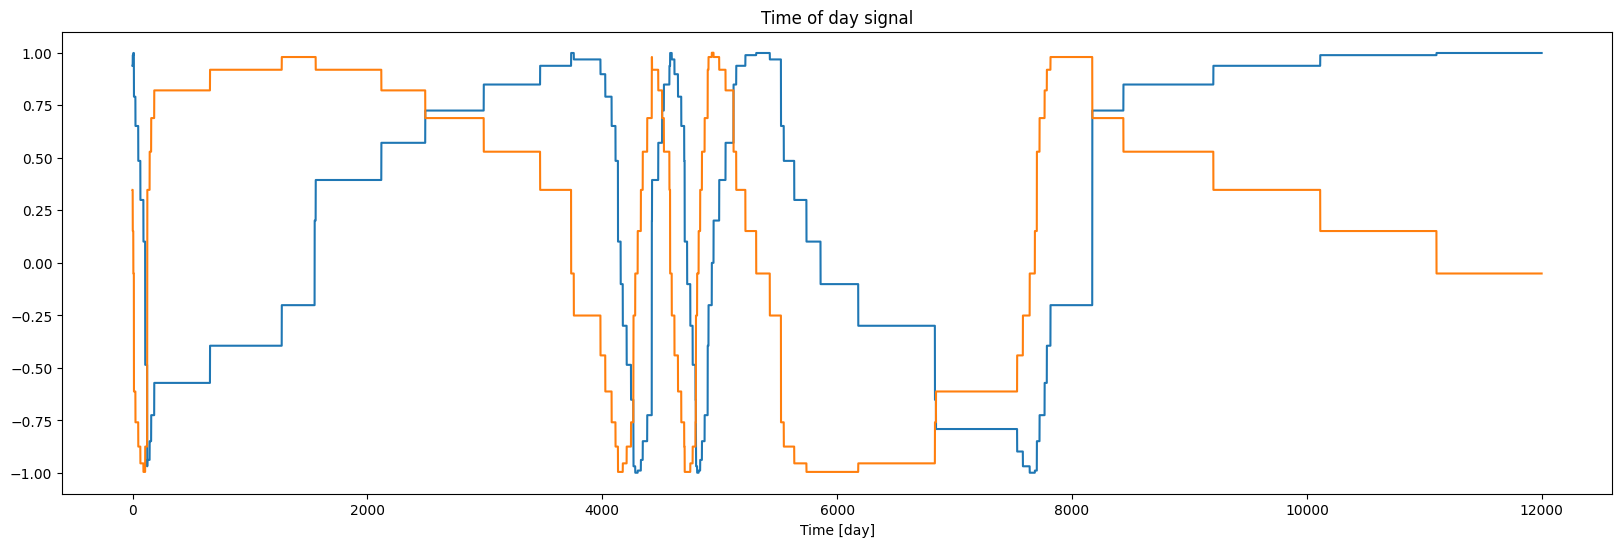

In [17]:
plt.figure(figsize=(20, 6))
plt.plot(train['day_sin'][0:12000])#.unique())
plt.plot(train['day_cos'][0:12000]) #.unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

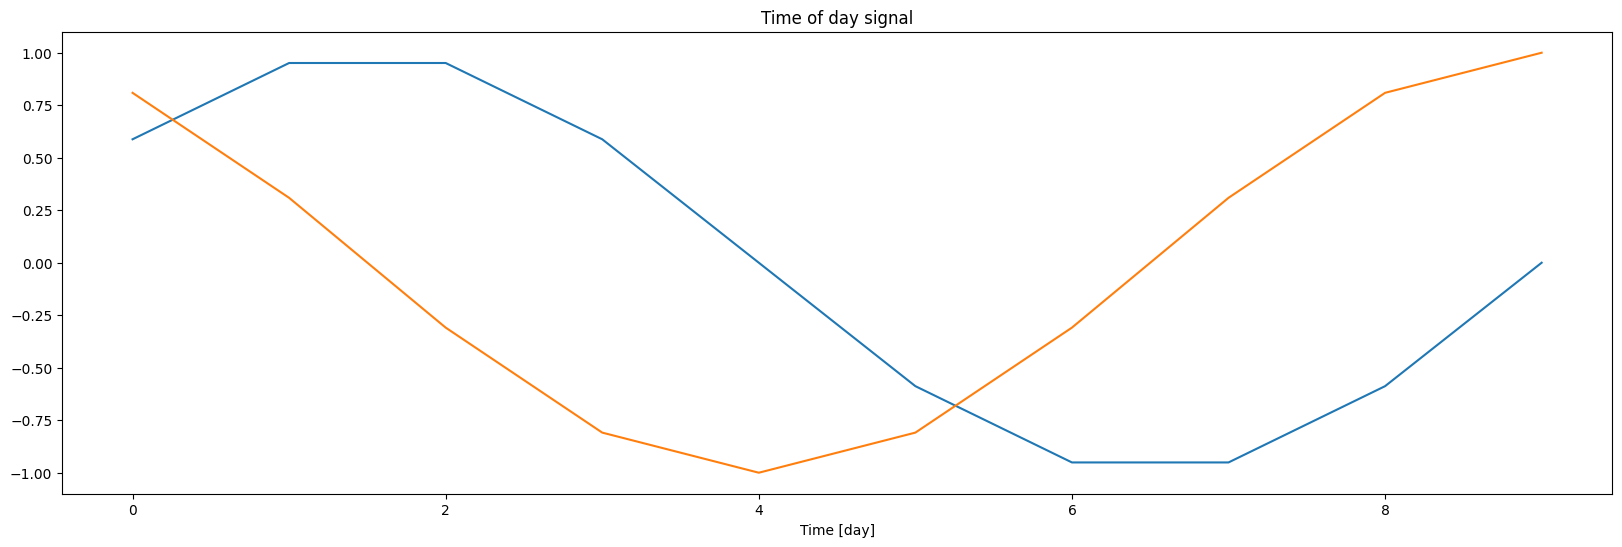

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(train['month_sin'].unique())
plt.plot(train['month_cos'].unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

In [19]:
!pip install category_encoders

In [20]:
import category_encoders as ce
import warnings

warnings.filterwarnings("ignore")


for feature in ["job", "marital"]:
    count_enc = ce.CountEncoder(cols=[feature])
    count_enc.fit(train)
    train[f"{feature}_count_enc"] = count_enc.transform(train)[feature].copy()
    test[f"{feature}_count_enc"] = count_enc.transform(test)[feature].copy()

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 54)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day,month,day_sin,day_cos,month_sin,month_cos,job_count_enc,marital_count_enc
0,38,blue-collar,married,1,0,863,0,0,6,1,78,1,0,0,0,2022,2022-01-06,False,dni_42591,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,6,1,0.937752,0.347305,0.587785,0.809017,10323,27098
1,29,services,single,1,0,814,0,0,6,1,54,1,0,0,0,2022,2022-01-06,False,dni_42592,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,6,1,0.937752,0.347305,0.587785,0.809017,4225,12879
2,40,admin.,divorced,1,0,212,0,0,7,1,176,1,0,0,0,2022,2022-01-07,True,dni_42596,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,7,1,0.988468,0.151428,0.587785,0.809017,5158,5162
3,51,technician,divorced,2,0,363,1,0,7,1,7,1,0,0,0,2022,2022-01-07,False,dni_42593,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,7,1,0.988468,0.151428,0.587785,0.809017,7638,5162
4,33,admin.,divorced,1,0,212,1,0,7,1,23,1,0,0,0,2022,2022-01-07,False,dni_42594,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,7,1,0.988468,0.151428,0.587785,0.809017,5158,5162



[INFO] Testing dataset dimnesions (rows, cols): (4593, 54)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_11,month_12,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,day,month,day_sin,day_cos,month_sin,month_cos,job_count_enc,marital_count_enc
0,60,retired,divorced,0,0,8434,0,0,2,11,105,2,0,0,0,2022,2022-11-02,False,dni_42093,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,2301,5162
1,65,retired,married,0,0,1992,0,0,2,11,459,1,0,0,0,2022,2022-11-02,False,dni_42106,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,2301,27098
2,20,student,single,0,0,0,0,0,2,11,69,4,182,4,0,2022,2022-11-02,True,dni_42097,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,946,12879
3,33,management,single,2,0,2485,1,0,2,11,91,2,0,0,0,2022,2022-11-02,False,dni_42098,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,9159,12879
4,30,technician,single,1,0,846,0,0,2,11,75,2,0,0,0,2022,2022-11-02,False,dni_42099,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,7638,12879


In [21]:
baseline_features = [
    'age', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
    'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
    'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
    'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
    'marital_single', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
    'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'

]

features = [
    'education', 'default', 'balance', 'housing', 'loan', 'duration', 'pdays', 'previous',
    'job_count_enc', 'marital_count_enc', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'cat_age'
]

target = 'cd'

<a id="entrenamiento-de-modelos"></a>
## 5. Entrenamiento de modelos

In [22]:
import os
import random

import numpy as np

SEED = 42


def set_seed_everything(seed: int = SEED):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed_everything()

In [23]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train[baseline_features].shape}")
    display(train[baseline_features].head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test[baseline_features].shape}")
    display(test[baseline_features].head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,38,1,0,863,0,0,78,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
1,29,1,0,814,0,0,54,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0
2,40,1,0,212,0,0,176,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
3,51,2,0,363,1,0,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
4,33,1,0,212,1,0,23,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0



[INFO] Testing dataset dimnesions (rows, cols): (4593, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,60,0,0,8434,0,0,105,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,65,0,0,1992,0,0,459,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,20,0,0,0,0,0,69,4,182,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,33,2,0,2485,1,0,91,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,30,1,0,846,0,0,75,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [24]:
X_train, X_test = train[baseline_features].values, test[baseline_features].values,
y_train, y_test = train[target].values, test[target].values

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV


sgd_clf = SGDClassifier(random_state=SEED, loss="hinge")
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score

print(
    "[INFO] Accuracy in training: ",
    np.mean(cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy"))
)
print(
    "[INFO] Accuracy in testing: ",
    np.mean(cross_val_score(sgd_clf, X_test, y_test, cv=5, scoring="accuracy"))
)

[INFO] Accuracy in training:  0.8161914321035318
[INFO] Accuracy in testing:  0.8438920774451721


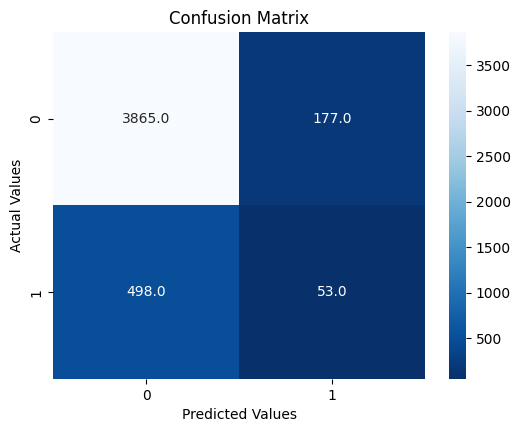

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

palette = sns.color_palette(["#e42256", "#00b1b0"])


def plot_confusion_matrix(cm: np.array, title: str = None):
    plt.figure(figsize=(6, 4.5))
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='.1f')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
    cm_plot.set_title("Confusion Matrix" if title is None else f"{title}")
    plt.show()


y_pred = sgd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

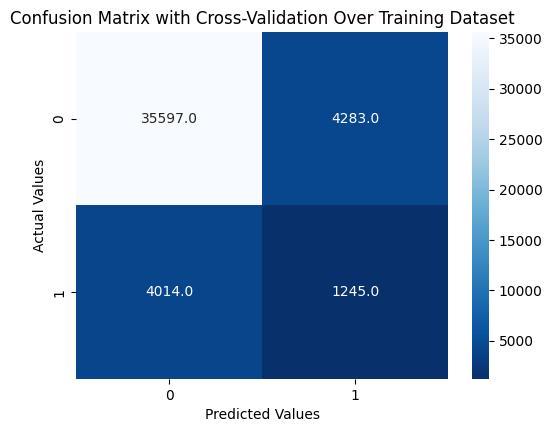

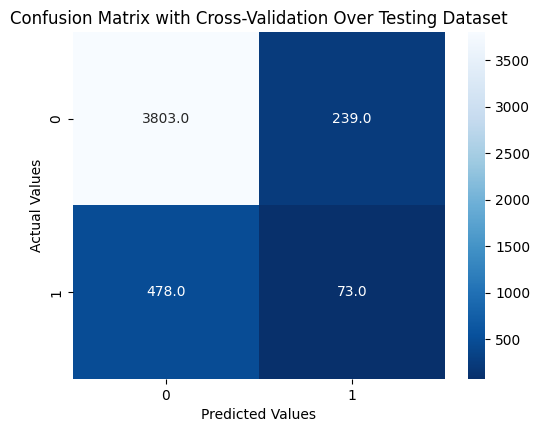

In [28]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Training Dataset")

y_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=5)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["False",  "Positive"]))

              precision    recall  f1-score   support

       False       0.89      0.94      0.91      4042
    Positive       0.23      0.13      0.17       551

    accuracy                           0.84      4593
   macro avg       0.56      0.54      0.54      4593
weighted avg       0.81      0.84      0.82      4593



In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
import warnings

warnings.filterwarnings("ignore")


cs = np.logspace(-5, 5, 20)

logit_clf = LogisticRegressionCV(Cs=cs)
logit_clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]))

In [31]:
y_pred = logit_clf.predict(X_test)
y_pred_proba = logit_clf.predict_proba(X_test)

In [32]:
print(classification_report(y_test, y_pred, target_names=["False",  "Positive"]))

              precision    recall  f1-score   support

       False       0.90      0.97      0.93      4042
    Positive       0.49      0.18      0.26       551

    accuracy                           0.88      4593
   macro avg       0.69      0.58      0.60      4593
weighted avg       0.85      0.88      0.85      4593



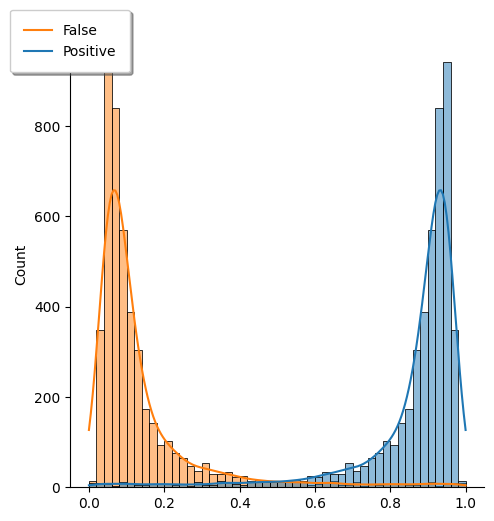

In [33]:
sns.displot(y_pred_proba, bins=50, kde=True, legend=False)
plt.legend(
    ["False", "Positive"],
    loc="center",
    bbox_to_anchor=(0, 1),
    fancybox=True,
    framealpha=1,
    shadow=True,
    borderpad=1
)
plt.show()

In [34]:
predictions = pd.concat([
    test[baseline_features + ["date"]],
    pd.DataFrame(
        index=np.arange(0, len(test)),
        data=np.concatenate((y_pred_proba, np.array([y_test]).T, np.array([y_pred]).T), axis=1),
        columns=["negative", "positive", "ground_truth", "label"]
    )
], axis=1)

predictions.sort_values(by="date", inplace=True)

with pd.option_context("display.max_columns", None):
    display(predictions)

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,date,negative,positive,ground_truth,label
0,60,0,0,8434,0,0,105,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.920268,0.079732,0.0,0.0
30,51,1,0,580,1,0,117,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.966272,0.033728,0.0,0.0
29,26,2,0,906,0,0,109,1,160,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.907061,0.092939,0.0,0.0
28,38,2,0,732,0,0,53,2,161,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.925995,0.074005,0.0,0.0
27,35,1,0,580,1,0,180,2,171,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.920841,0.079159,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,46,2,0,461,0,0,369,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-30,0.836630,0.163370,1.0,0.0
4589,30,2,0,3185,1,0,158,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-30,0.940372,0.059628,0.0,0.0
4590,40,1,0,3126,1,0,110,3,232,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-30,0.919913,0.080087,0.0,0.0
4591,32,1,0,14533,0,0,646,3,198,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-31,0.484972,0.515028,0.0,1.0


In [35]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train[features].shape}")
    display(train[features].head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test[features].shape}")
    display(test[features].head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 15)


,education,default,balance,housing,loan,duration,pdays,previous,job_count_enc,marital_count_enc,day_sin,day_cos,month_sin,month_cos,cat_age
0,1,0,863,0,0,78,0,0,10323,27098,0.937752,0.347305,0.587785,0.809017,3
1,1,0,814,0,0,54,0,0,4225,12879,0.937752,0.347305,0.587785,0.809017,2
2,1,0,212,0,0,176,0,0,5158,5162,0.988468,0.151428,0.587785,0.809017,3
3,2,0,363,1,0,7,0,0,7638,5162,0.988468,0.151428,0.587785,0.809017,4
4,1,0,212,1,0,23,0,0,5158,5162,0.988468,0.151428,0.587785,0.809017,2



[INFO] Testing dataset dimnesions (rows, cols): (4593, 15)


,education,default,balance,housing,loan,duration,pdays,previous,job_count_enc,marital_count_enc,day_sin,day_cos,month_sin,month_cos,cat_age
0,0,0,8434,0,0,105,0,0,2301,5162,0.394356,0.918958,0.587785,0.809017,5
1,0,0,1992,0,0,459,0,0,2301,27098,0.394356,0.918958,0.587785,0.809017,6
2,0,0,0,0,0,69,182,4,946,12879,0.394356,0.918958,0.587785,0.809017,1
3,2,0,2485,1,0,91,0,0,9159,12879,0.394356,0.918958,0.587785,0.809017,2
4,1,0,846,0,0,75,0,0,7638,12879,0.394356,0.918958,0.587785,0.809017,2


In [36]:
X_train, X_test = train[features].values, test[features].values
y_train, y_test = train[target].values, test[target].values

In [39]:
from sklearn.base import clone
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_validate

import xgboost as xgb


def fit_and_score(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train, eval_set=[(X_test, y_test)])

    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return estimator, train_score, test_score


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=100)

resutls = {}
X, y = X_train, y_train
for training, validation in cv.split(X, y):
    X_train = X[training]
    X_val = X[validation]
    y_train = y[training]
    y_val = y[validation]
    est, train_score, val_score = fit_and_score(
        clone(clf), X_train, X_val, y_train, y_val
    )
    resutls[est] = (train_score, val_score)

[0]	validation_0-logloss:0.50944
[1]	validation_0-logloss:0.40645
[2]	validation_0-logloss:0.34376
[3]	validation_0-logloss:0.30414
[4]	validation_0-logloss:0.27679
[5]	validation_0-logloss:0.25786
[6]	validation_0-logloss:0.24567
[7]	validation_0-logloss:0.23720
[8]	validation_0-logloss:0.23069
[9]	validation_0-logloss:0.22565
[10]	validation_0-logloss:0.22196
[11]	validation_0-logloss:0.21969
[12]	validation_0-logloss:0.21698
[13]	validation_0-logloss:0.21568
[14]	validation_0-logloss:0.21504
[15]	validation_0-logloss:0.21398
[16]	validation_0-logloss:0.21245
[17]	validation_0-logloss:0.21232
[18]	validation_0-logloss:0.21171
[19]	validation_0-logloss:0.21085
[20]	validation_0-logloss:0.21075
[21]	validation_0-logloss:0.21072
[22]	validation_0-logloss:0.21072
[23]	validation_0-logloss:0.21018
[24]	validation_0-logloss:0.20960
[25]	validation_0-logloss:0.20920
[26]	validation_0-logloss:0.20873
[27]	validation_0-logloss:0.20751
[28]	validation_0-logloss:0.20668
[29]	validation_0-loglos

In [40]:
resutls

{XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=100,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...): (0.9368743504184672,
  0.9079497907949791),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=100,
    

In [41]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import randint
import numpy as np

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier

rng = np.random.RandomState(SEED)

X, y = X_train, y_train
param_dist = {
    "max_depth": randint(0, 13),
    "reg_alpha": randint(0, 6),
    "reg_lambda": randint(1, 7),
    "min_child_weight": randint(1, 11),
    "learning_rate": [0.01, 0.1, 0.3]
}

def fit_and_score(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    rsh = HalvingRandomSearchCV(
        estimator=estimator, param_distributions=param_dist, factor=2, random_state=rng
    )
    rsh.fit(X_train, y_train)

    train_score = rsh.score(X_train, y_train)
    test_score = rsh.score(X_test, y_test)

    return rsh.best_estimator_, best_params_, train_score, test_score


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

clf = xgb.XGBClassifier(tree_method="hist")

resutls = {}
for training, validation in cv.split(X, y):
    X_train = X[training]
    X_val = X[validation]
    y_train = y[training]
    y_val = y[validation]
    best_estimator_, best_params_, val_score, val_score = fit_and_score(
        clone(clf), X_train, X_val, y_train, y_val
    )
    resutls[best_estimator_] = (train_score, val_score, best_params_)



[0]	validation_0-logloss:0.50817
[1]	validation_0-logloss:0.40786
[2]	validation_0-logloss:0.34481
[3]	validation_0-logloss:0.30358
[4]	validation_0-logloss:0.27662
[5]	validation_0-logloss:0.25781
[6]	validation_0-logloss:0.24467
[7]	validation_0-logloss:0.23560
[8]	validation_0-logloss:0.22892
[9]	validation_0-logloss:0.22405
[10]	validation_0-logloss:0.22094
[11]	validation_0-logloss:0.21856
[12]	validation_0-logloss:0.21620
[13]	validation_0-logloss:0.21481
[14]	validation_0-logloss:0.21421
[15]	validation_0-logloss:0.21315
[16]	validation_0-logloss:0.21168
[17]	validation_0-logloss:0.21166
[18]	validation_0-logloss:0.21152
[19]	validation_0-logloss:0.21148
[20]	validation_0-logloss:0.21123
[21]	validation_0-logloss:0.21129
[22]	validation_0-logloss:0.21084
[23]	validation_0-logloss:0.21035
[24]	validation_0-logloss:0.21041
[25]	validation_0-logloss:0.21024
[26]	validation_0-logloss:0.20970
[27]	validation_0-logloss:0.20970
[28]	validation_0-logloss:0.20943
[29]	validation_0-loglos

<a id='referencias'></a>
## Referencias

[1] Halswanter, T. (2016). *An Introduction to Statistics with Python: With Applications in the Life Sciences.* Springer.

[2] Géron, A. (2022). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow.* " O'Reilly Media, Inc.".

[3] VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.".

[4] Aggarwal, C. C. (2015). *Data mining: the textbook (Vol. 1)*. New York: springer.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>